In [1]:
import numpy as np 
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from six import StringIO
import pydotplus
from IPython.display import Image 
# IMPORTANDO O DATASET PARA O DATAFRAME
df = pd.read_csv('dataset_einstein.csv', delimiter=';')
# MOSTRANDO AS PRIMEIRAS CINCO LINHAS
print(df.head(5))
count_row = df.shape[0]  # PEGANDO OS NÚMEROS DE REGISTROS
count_col = df.shape[1]  # PEGANDO OS NUMEROS DE COLUNAS
print(count_row)
print(count_col)
# REPAREM QUE HÁ MUITOS REGISTROS EM QUE HÁ DADOS FALTANDO NOS CAMPOS

        Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes. 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes. 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                     

In [6]:
# REMOVENDO OS REGISTROS NOS QUAIS PELO MENOS UM CAMPO ESTÁ EM BRANCO (NAN) 
df = df.dropna()

print(df.head(5))

print('Quantidade de campos(colunas): ', df.shape[1])
print('Total de registros:', df.shape[0])

#VAMOS VERIFICAR SE O BANCO DE DADOS ESTÁ BALANCEADO OU DESBALANCEADO
print ('Total de registros negativos: ', df[df['SARS-Cov-2 exam result'] =='negative'].shape[0])
print ('Total de registros positivos: ', df[df['SARS-Cov-2 exam result'] =='positive'].shape[0])

         Patient ID  Patient age quantile SARS-Cov-2 exam result  \
1   126e9dd13932f68                    17               negative   
8   8bb9d64f0215244                     1               negative   
28  fc41531ca4faf1e                    13               negative   
29  891d0f6449ff3d7                    14               negative   
30  ebdd7c67fcb21b4                     9               negative   

    Patient addmited to regular ward (1=yes. 0=no)  \
1                                                0   
8                                                0   
28                                               0   
29                                               0   
30                                               1   

    Patient addmited to semi-intensive unit (1=yes. 0=no)  \
1                                                   0       
8                                                   1       
28                                                  0       
29                    

In [7]:
# VAMOS JOGAR AS ETIQUETAS PARA Y
Y = df['SARS-Cov-2 exam result'].values 
print(Y)

# X SERÁ A NOSSA MATRIZ COM AS FEATURES
# VAMOS PEGAR OS CAMPOS DE TREINAMENTO (Hemoglobin, Leukocytes, Basophils, Proteina C reativa mg/dL)

X = df[['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']].values

# VAMOS MOSTRAR X 
print(X)


['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negat

In [8]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=3)


In [9]:
# CRIAR UM ALGORTIMO QUE SERÁ DO TIPO DE ÁRVORE DE DECISÃO

algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# AGORA EM MINHA_ARVORE EU TENHO ASSOCIADA A ELA O ALGORITMO DE TREINAMENTO, 
# BASICAMENTE A RECEITA QUE VIMOS NA PARTE TÉORICA. 

#AGORA PRECISAMOS TREINÁ-LA
modelo = algortimo_arvore.fit(X_treino, Y_treino)

[0.13553694 0.52890209 0.18040441 0.15515656]


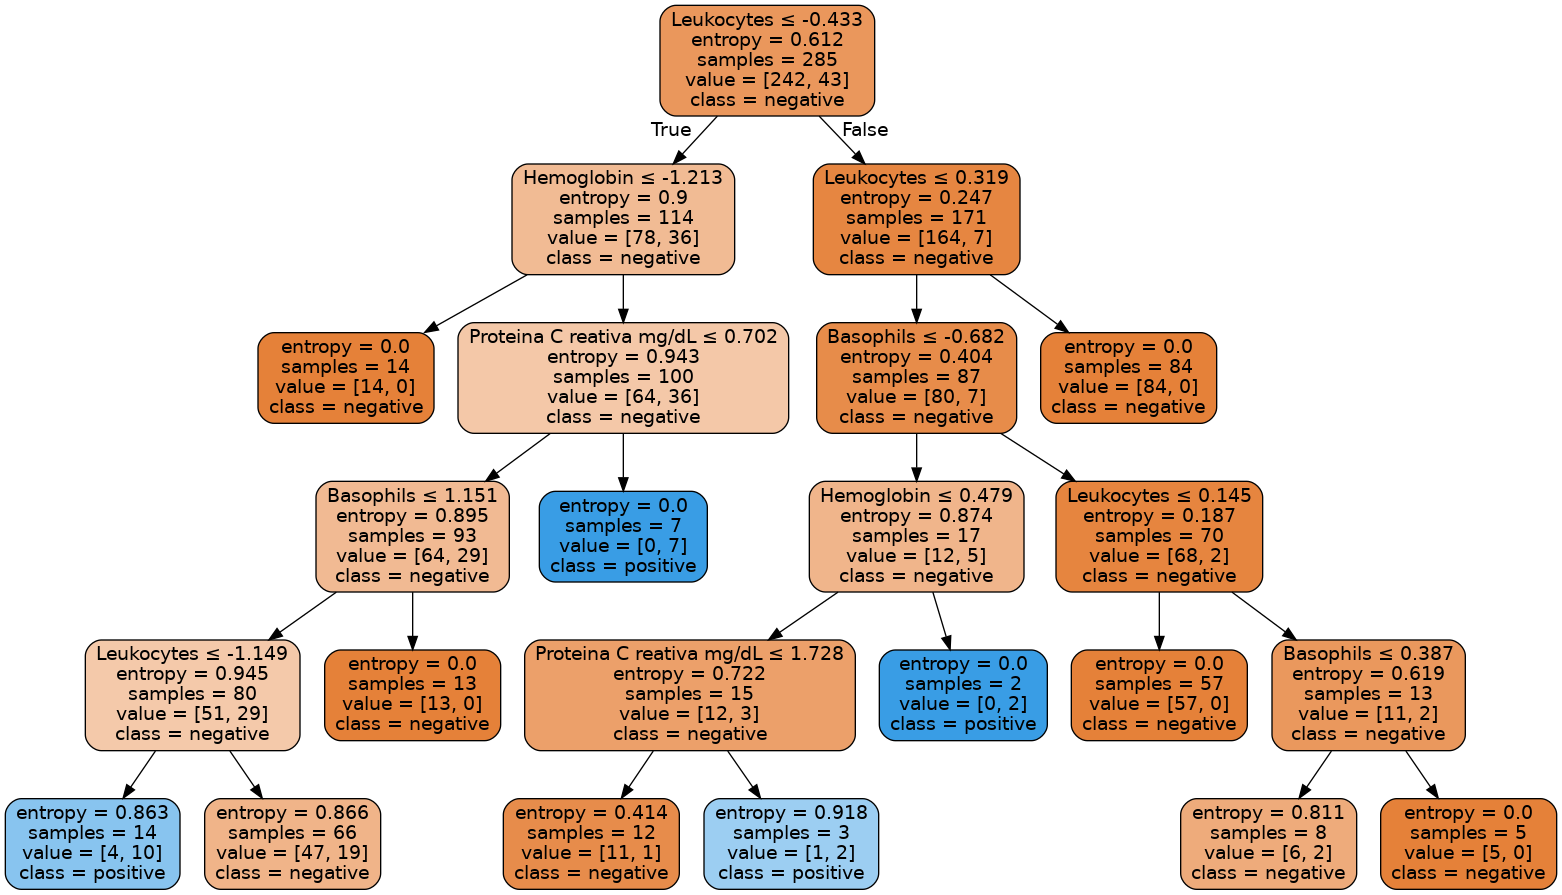

In [10]:
#PODEMOS MOSTRAR A FEATURE MAIS IMPORTANTE (WHITE BOX?)
print (modelo.feature_importances_)


nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']
nome_classes = modelo.classes_

# MONTAR A IMAGEM DA ÁRVORE
dot_data = StringIO()
#dot_data = tree.export_graphviz(my_tree_one, out_file=None, feature_names=featureNames)
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')


Feature ranking:
1. feature 1 (0.528902)
2. feature 2 (0.180404)
3. feature 3 (0.155157)
4. feature 0 (0.135537)


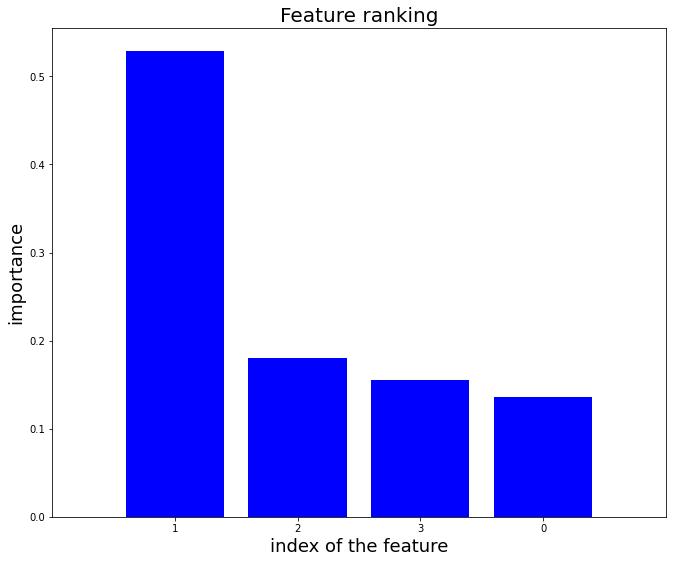

In [11]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

#Indice das features
# 0 - 'Hemoglobin', 
# 1 - 'Leukocytes'
# 2 - 'Basophils',
# 3 - 'Proteina C reativa mg/dL']

In [12]:


# APLICANDO O MODELO NA BASE DE TESTES E ARMAZENDO O RESULTADO EM Y_PREDICOES
Y_predicoes = modelo.predict(X_teste)

#AVALIAÇÃO DO MODELO 
#VAMOS AVALIAR O VALOR REAL DO DATASET Y_TESTE COM AS PREDIÇÕES
print("ACURÁCIA DA ÁRVORE: ", accuracy_score(Y_teste, Y_predicoes))
print (classification_report(Y_teste, Y_predicoes))

# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE



ACURÁCIA DA ÁRVORE:  0.8472222222222222
              precision    recall  f1-score   support

    negative       0.87      0.97      0.91        60
    positive       0.60      0.25      0.35        12

    accuracy                           0.85        72
   macro avg       0.73      0.61      0.63        72
weighted avg       0.82      0.85      0.82        72



Matriz de Confusão sem normalizacão 
[[58  2]
 [ 9  3]]


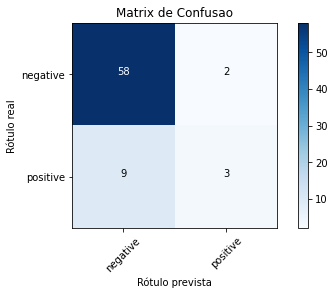

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_teste, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')